In [50]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import tensorflow
import pandas as pd
import re
import collections

from pprint import pprint
from matplotlib import cm
from tensorboard.backend.event_processing import event_accumulator

## Get the folders we want to plot

In [57]:
log_dir = '../train/logs/'
folders = []
for folder in os.listdir(log_dir):
    folder = os.path.join(log_dir, folder)
    if not os.path.isdir(folder):
        continue
    folders.append(folder)
folders = list(filter(lambda _: ('REG_0.00e+00' in _), folders))

## Loop over these folders

In [60]:
data = dict()
for folder in sorted(folders):
    
    # Load the log file
    ea = event_accumulator.EventAccumulator(folder)
    ea.Reload()
    
    # Read out the parameters of that run from the log file name
    datetime, event, dist, size, lr, thresh, reg = re.findall(r"\[(.*?)\]", folder)
    
    # Save the relevant properties as pandas DataFrames in a dictionary
    if event not in data:
        data[event] = dict()
    if dist not in data[event]:
        data[event][dist] = dict()
        
    data[event][dist]['loss'] = pd.DataFrame(ea.Scalars('loss'))
    data[event][dist]['hamming_dist'] = pd.DataFrame(ea.Scalars('hamming_dist'))
    data[event][dist]['val_loss'] = pd.DataFrame(ea.Scalars('val_loss'))
    data[event][dist]['val_hamming_dist'] = pd.DataFrame(ea.Scalars('val_hamming_dist'))

INFO:tensorflow:No path found after ../train/logs/[2017-10-24_16:18]-[GW150914]-[0100_0300]-[8k]-[LR_1.0e-04]-[THRESH_0.00e+00]_[REG_0.00e+00]/events.out.tfevents.1508854737.g024
INFO:tensorflow:No path found after ../train/logs/[2017-10-24_16:19]-[GW150914]-[0250_0500]-[8k]-[LR_1.0e-04]-[THRESH_0.00e+00]_[REG_0.00e+00]/events.out.tfevents.1508854742.g017
INFO:tensorflow:No path found after ../train/logs/[2017-10-24_16:19]-[GW150914]-[0400_0800]-[8k]-[LR_1.0e-04]-[THRESH_0.00e+00]_[REG_0.00e+00]/events.out.tfevents.1508854749.g014
INFO:tensorflow:No path found after ../train/logs/[2017-10-24_16:23]-[GW150914]-[0700_1200]-[8k]-[LR_1.0e-04]-[THRESH_0.00e+00]_[REG_0.00e+00]/events.out.tfevents.1508855028.g020
INFO:tensorflow:No path found after ../train/logs/[2017-10-24_16:23]-[GW151226]-[0100_0300]-[8k]-[LR_1.0e-04]-[THRESH_0.00e+00]_[REG_0.00e+00]/events.out.tfevents.1508855025.g021
INFO:tensorflow:No path found after ../train/logs/[2017-10-24_16:23]-[GW151226]-[0400_0800]-[8k]-[LR_1.0e

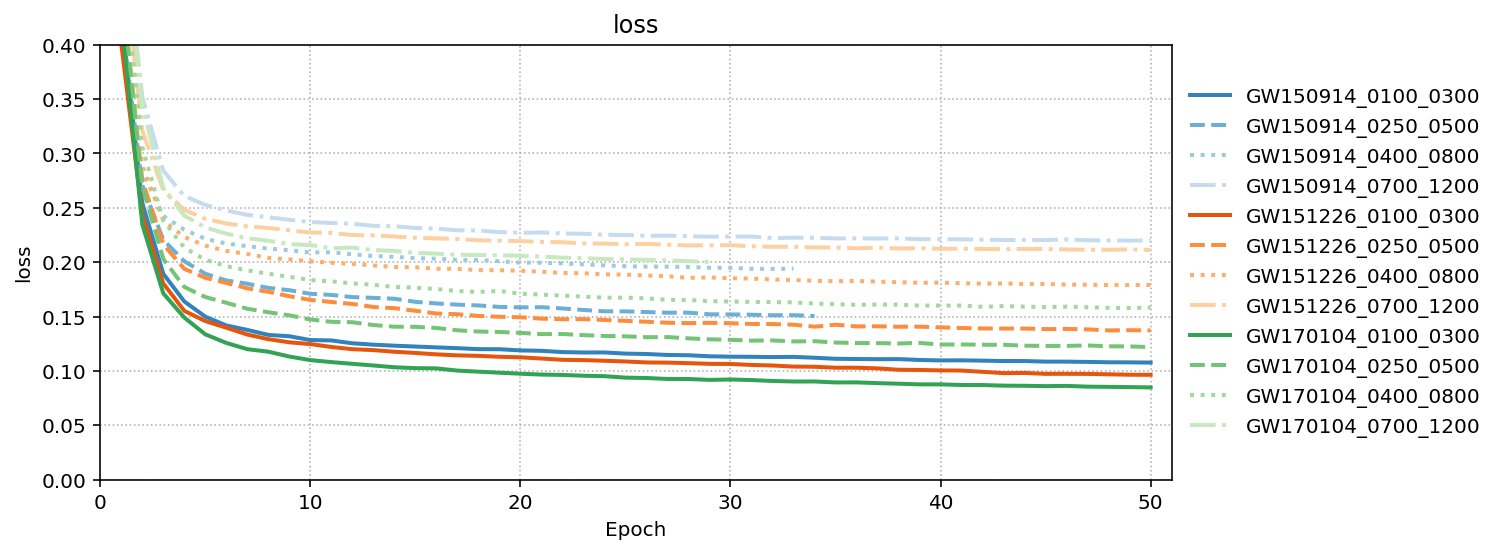

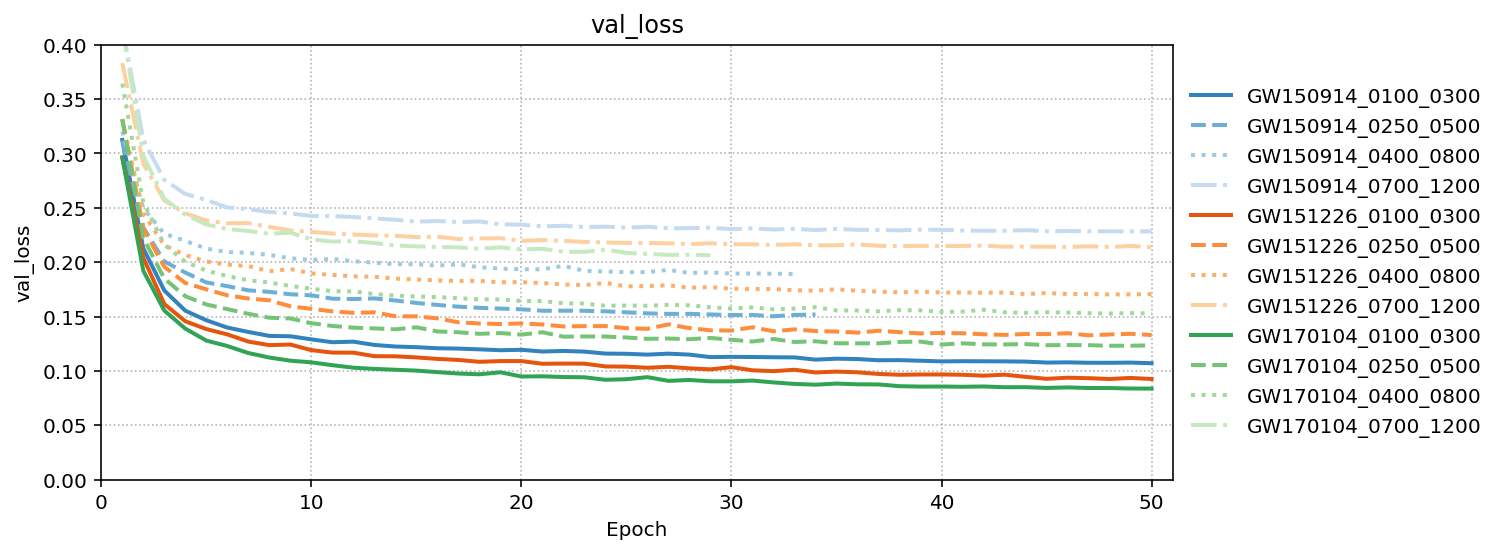

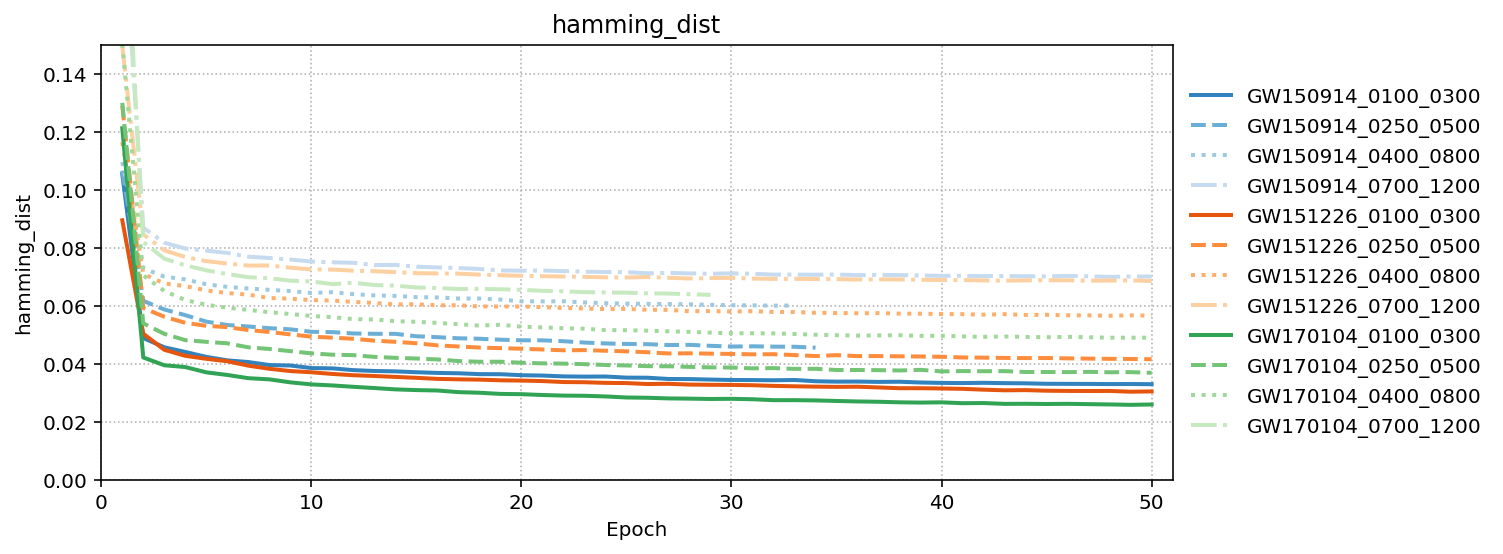

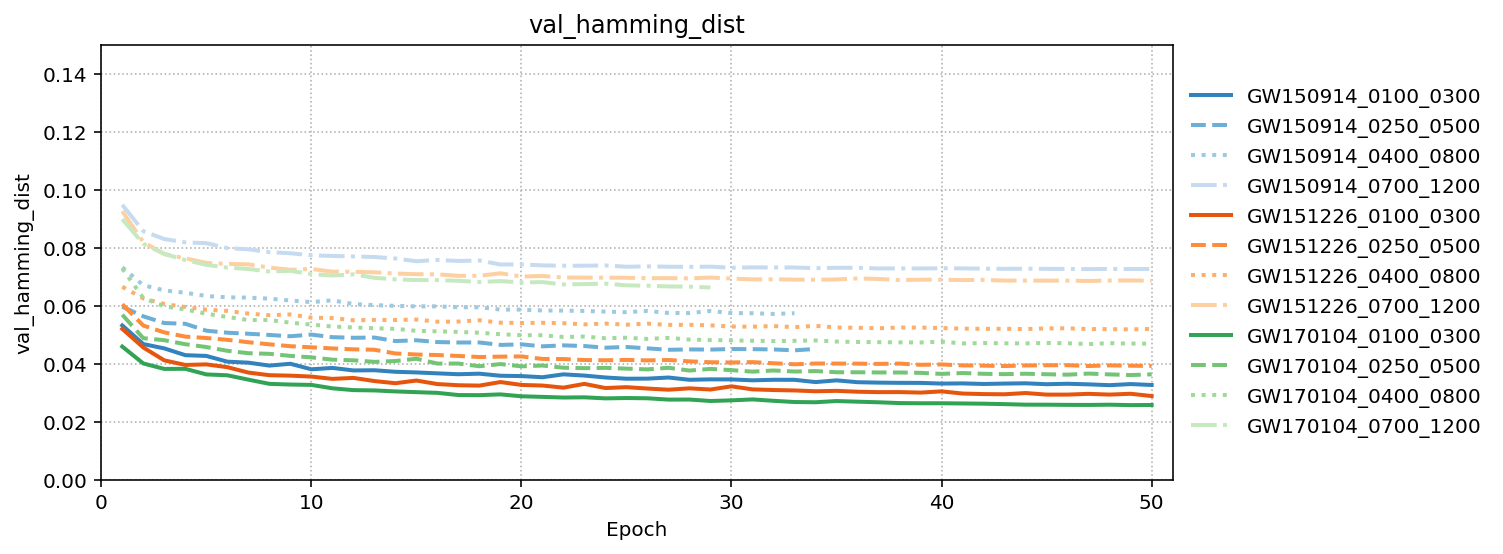

In [61]:
colors = cm.get_cmap('tab20c')(np.linspace(0, 1, 20))
linestyles = ['-', '--', ':', '-.']

for h, metric in enumerate(['loss', 'val_loss', 'hamming_dist', 'val_hamming_dist']):
    for i, event in enumerate(['GW150914', 'GW151226', 'GW170104']):
        for j, dist in enumerate(['0100_0300', '0250_0500', '0400_0800', '0700_1200']):
            
            plt.plot(data[event][dist][metric]['step']+1, 
                     data[event][dist][metric]['value'],
                     color=colors[4*i+j],
                     linestyle=linestyles[j],
                     linewidth=2,
                     label='{}_{}'.format(event, dist))
    
    plt.gcf().set_size_inches(12, 4, forward=True)
    plt.ylim(0, [0.4, 0.4, 0.15, 0.15][h])
    plt.xlim(0, 51)
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    
    plt.legend(loc='best')
    plt.title('{}'.format(metric))
    plt.grid(ls=':')
    
    # Shrink current axis by 20%
    box = plt.gca().get_position()
    plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
    
    plt.show()